In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
file_path = "TSLA.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jillanisofttech/tesla-stock-price",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipython-input-1689046082.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 66.3k/66.3k [00:00<00:00, 1.08MB/s]

First 5 records:          Date       High        Low       Open      Close      Volume  \
0  2019-09-30  48.796001  47.222000  48.599998  48.174000  29399000.0   
1  2019-10-01  49.189999  47.826000  48.299999  48.938000  30813000.0   
2  2019-10-02  48.930000  47.886002  48.658001  48.625999  28157000.0   
3  2019-10-03  46.896000  44.855999  46.372002  46.605999  75422500.0   
4  2019-10-04  46.956001  45.613998  46.321999  46.285999  39975000.0   

   Adj Close  
0  48.174000  
1  48.938000  
2  48.625999  
3  46.605999  
4  46.285999  


In [2]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
data = df['Close'].values
data = data.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

print("Data preprocessing complete.")

Data preprocessing complete.


In [6]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60

X, y = create_dataset(scaled_data, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Sequence creation complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Sequence creation complete.
X_train shape: (462, 60)
X_test shape: (116, 60)
y_train shape: (462,)
y_test shape: (116,)


In [7]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("RNN model built and compiled.")
model.summary()

RNN model built and compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

history = model.fit(X_train, y_train, epochs=100, batch_size=32)

print("Model training complete.")

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1201
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0095
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0017
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0017
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

In [9]:
last_look_back_data = scaled_data[len(scaled_data) - look_back:]
last_look_back_data = last_look_back_data.reshape(1, look_back, 1)

predicted_prices = []
current_batch = last_look_back_data

for i in range(20):
    predicted_price = model.predict(current_batch)
    predicted_prices.append(predicted_price[0, 0])

    current_batch = np.append(current_batch[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

print("Predicted prices for the next 20 days:")
print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted prices for the next 20 days:
[[987.15173]
 [990.14954]
 [974.28625]
 [948.176  ]
 [941.5408 ]
 [943.6316 ]
 [959.8307 ]
 [968.05994]
 [958.6118 ]
 [955.434  ]
 [940.56006]
 [924.48676]
 [917.60547]
 [920.0669 ]
 [917.04913]
 [906

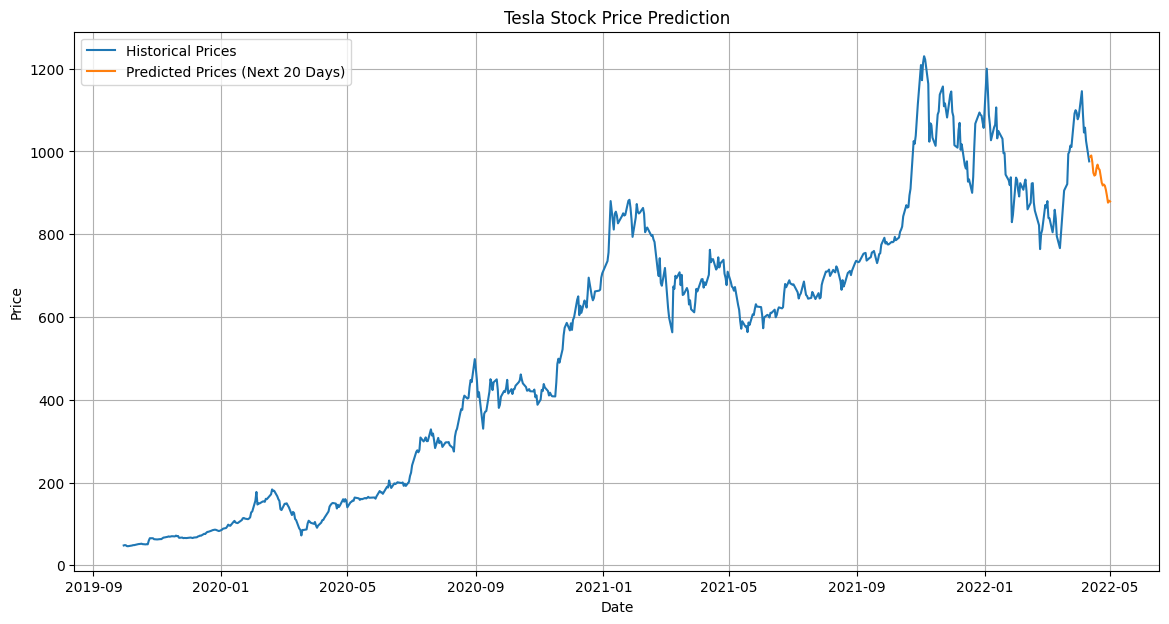

In [10]:

last_date = df.index[-1]
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=20, freq='D')

predicted_prices_series = pd.Series(predicted_prices.flatten(), index=predicted_dates)

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Historical Prices')
plt.plot(predicted_prices_series, label='Predicted Prices (Next 20 Days)')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:

last_date = df.index[-1]
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=20, freq='D')

predicted_prices_series = pd.Series(predicted_prices.flatten(), index=predicted_dates)

print("Predicted prices for the next 20 days:")
display(predicted_prices_series)

Predicted prices for the next 20 days:


,0
2022-04-12,987.151733
2022-04-13,990.149536
2022-04-14,974.286255
2022-04-15,948.176025
2022-04-16,941.540771
2022-04-17,943.631592
2022-04-18,959.830688
2022-04-19,968.059937
2022-04-20,958.611816
2022-04-21,955.434021
